In [1]:
# NO CODE

from datascience import *
from prob140 import *
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
import math
from scipy import stats

## The Normal Distribution ##

We can now think of the normal distribution as the distribution of a random variable that has values on the whole number line, instead of just as a mathematical approximation to other distributions.

The random variable $X$ has the *normal* $(\mu, \sigma^2)$ distribution if the density of $X$ is given by

$$
f(x) ~ = ~ \frac{1}{\sqrt{2\pi}\sigma} e^{-\frac{1}{2}\big{(}\frac{x-\mu}{\sigma}\big{)}^2}, ~~~~ -\infty < x < \infty
$$

This is the familiar normal curve we have been using for a while.

<>:7: SyntaxWarning: invalid escape sequence '\m'
<>:7: SyntaxWarning: invalid escape sequence '\m'
<>:7: SyntaxWarning: invalid escape sequence '\m'
<>:13: SyntaxWarning: invalid escape sequence '\m'
<>:7: SyntaxWarning: invalid escape sequence '\m'
<>:7: SyntaxWarning: invalid escape sequence '\m'
<>:7: SyntaxWarning: invalid escape sequence '\m'
<>:13: SyntaxWarning: invalid escape sequence '\m'
/var/folders/g7/vpsqt6yn74z6qv_c_2x7jsg80000gn/T/ipykernel_53873/423879627.py:7: SyntaxWarning: invalid escape sequence '\m'
  x_tick_labels = ['', '', '', '$\mu - \sigma$', '$\mu$', '$\mu+\sigma$', '', '', '']
/var/folders/g7/vpsqt6yn74z6qv_c_2x7jsg80000gn/T/ipykernel_53873/423879627.py:7: SyntaxWarning: invalid escape sequence '\m'
  x_tick_labels = ['', '', '', '$\mu - \sigma$', '$\mu$', '$\mu+\sigma$', '', '', '']
/var/folders/g7/vpsqt6yn74z6qv_c_2x7jsg80000gn/T/ipykernel_53873/423879627.py:7: SyntaxWarning: invalid escape sequence '\m'
  x_tick_labels = ['', '', '', '$\mu - \sigma$', '$

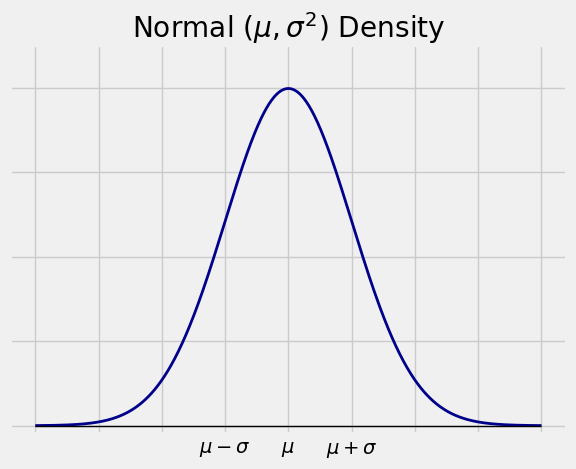

In [2]:
# NO CODE

z = np.arange(-4, 4.01, .01)
phi = stats.norm.pdf(z)
plt.plot(z, phi, color='darkblue', lw=2)
plt.plot([-4, 4], [0, 0], color='k', lw=1)
x_tick_labels = ['', '', '', '$\mu - \sigma$', '$\mu$', '$\mu+\sigma$', '', '', '']
plt.xticks(np.arange(-4, 4.01), x_tick_labels)
plt.ylim(-0.01, 0.45)
#plt.xlabel('$x$')
plt.yticks(np.arange(0, 0.41, 0.1), 5*[''])
plt.ylabel('')
plt.title('Normal $(\mu, \sigma^2)$ Density');

The random variable $Z$ has the *standard normal distribution* if the distribution of $Z$ is normal $(0, 1)$. The cdf of $Z$ is the familiar standard normal cdf $\Phi$.

If $X$ has the normal $(\mu, \sigma^2)$ distribution then

$$
P(X < x) ~ = ~ P\left(Z < \frac{x - \mu}{\sigma}\right)
$$

where $Z = \frac{X - \mu}{\sigma}$ is what we have been calling "$X$ in standard units". As before, conversions back and forth between $X$ and $Z$ will be useful for calculations. To get from $Z$ to $X$, use $X = \sigma Z + \mu$.


We have been treating the parameters $\mu$ and $\sigma$ like the mean and the SD of the distribution, and indeed it turns out (after calculations that we will not do) that:

- $E(X) = \mu$
- $SD(X) = \sigma$

### Sums of Independent Normal Variables ###

We will use (without proof) an important result:

If $X$ and $Y$ are independent normal random variables then $X+Y$ also has a normal distribution.

You can test this out by simulation, or take a higher level course to see a mathematical proof. The result should seem reasonable, however, so let's proceed to use it.

First, we should identify the parameters of the normal distribution of $X+Y$. Define the notation

- $E(X) = \mu_X$, $Var(X) = \sigma^2_X$
- $E(Y) = \mu_Y$, $Var(Y) = \sigma^2_Y$

Then

$$
E(X+Y) ~ = ~ \mu_X + \mu_Y ~~~~~~~~~~~ Var(X+Y) = \sigma^2_X + \sigma^2_Y
$$

The additivity of the variance is due to the independence of $X$ and $Y$.

This result can be extended to any linear combination of $X$ and $Y$. For example, $X -2Y + 3$ has the normal distribution with mean $\mu_X -2\mu_Y + 3$ and variance $\sigma_X^2 + 4\sigma_Y^2$. These parameters follow from properties of means and variances, not from any property of the normal distribution.

A particularly important linear combination is the difference $X-Y$ which is normal $(\mu_X - \mu_Y, \sigma_X^2+\sigma_Y^2)$. It is used in inference as in the following examples.

### Confidence Interval for the Difference Between Means ###

Suppose $n$ and $m$ are large sample sizes, and suppose you have two independent samples as follows:

- $X_1, X_2, \ldots, X_n$ are i.i.d. with mean $\mu_X$ and SD $\sigma_X$
- $Y_1, Y_2, \ldots, Y_m$ are i.i.d. with mean $\mu_Y$ and SD $\sigma_Y$

Now suppose you want to estimate the difference $\mu_X - \mu_Y$. This is the difference between the population means.

Let $\bar{X}$ and $\bar{Y}$ be the two sample means. A natural estimator of $\mu_X - \mu_Y$ is $\bar{X} - \bar{Y}$, the difference between the sample means.

By the Central Limit Theorem, the distribution of $\bar{X}$ is approximately normal, as is the distribution of $\bar{Y}$. We also know the parameters:

- $\bar{X}$ is approximately normal $(\mu_X, \frac{\sigma_X^2}{n})$
- $\bar{Y}$ is approximately normal $(\mu_Y, \frac{\sigma_Y^2}{m})$

Therefore by the independence of the two samples,

$$
\bar{X} - \bar{Y} ~ \text{ is approximately normal } \left(\mu_X - \mu_Y, \frac{\sigma_X^2}{n} + \frac{\sigma_Y^2}{m} \right)
$$

So an approximate 95% confidence interval for $\mu_X - \mu_Y$ is given by

$$
\bar{X} - \bar{Y} ~ \pm ~ 2\sqrt{ \frac{\sigma_X^2}{n} + \frac{\sigma_Y^2}{m} }
$$

As an example, suppose you have drawn samples of people independently from two cities, and suppose you have collected the following data.

- The incomes of the 400 sampled people in City X have an average of 70,000 dollars and an SD of 40,000 dollars.
- The incomes of the 600 sampled people in City Y have an average of 80,000 dollars and an SD of 50,000 dollars.

To construct a confidence interval for the difference between the mean incomes in the two cities, let's define "difference" to be "mean of City X minus mean of City Y".

The center of the confidence interval is the observed value of $\bar{X} - \bar{Y}$, the difference between the two sample means. An approximate 95% confidence interval for the difference between the two population means is given by

$$
-10000 ~ \pm ~ 2\sqrt{ \frac{\sigma_X^2}{400} + \frac{\sigma_Y^2}{600} }
$$

where $\sigma_X^2$ is the mean income in City X and $\sigma_Y^2$ is the mean income in City Y. The trouble is that we don't know those two numbers. But as we have done so often before, we can estimate the variance we need by substituting the sample variances.

$$
\sqrt{\frac{\sigma_X^2}{400} + \frac{\sigma_Y^2}{600}} ~ \approx ~ \sqrt{\frac{40000^2}{400} + \frac{50000^2}{600}} ~ \approx ~ 2858
$$

In [3]:
( (40000**2)/400 + (50000**2)/600 ) ** 0.5

2857.738033247041

An approximate 95% confidence interval for the difference between the two population means is therefore given by

$$
-10000 ~ \pm ~ 2\times2858 ~ \approx ~ (-15716, -4824)
$$

It's fine for the endpoints to be negative. We are estimating a difference. Since we have calculated the difference in the order "mean of X minus mean of Y", what we are seeing is just that City $X$ appears to have a smaller mean than City $Y$.

### Test for the Equality of Two Means ###
Also known as an A/B test, this test attempts to decide whether the two underlying population means are the same.

With the data as in the example above, suppose we test the following hypotheses.

$H_0$: The mean income in City X is the same as the mean income in City Y; that is, $\mu_X = \mu_Y$.

$H_A$: The mean income in City Y is greater than that in City X; that is, $\mu_Y > \mu_X$.

It is important to keep in mind that the hypothese are just about the two population means. The null hypothesis is not saying that the two population distributions are the same. It is just saying that the two means are the same. The SDs might be different, the shapes might be different – the null hypothesis makes no claim about those.

A natural test statistic is $\bar{Y} - \bar{X}$. Large values of this statistic favor the alternative.

Under $H_0$, the distribution of $\bar{Y} - \bar{X}$ is approximately normal with mean $0$ and standard deviation

$$
\sqrt{\frac{\sigma_X^2}{400} + \frac{\sigma_Y^2}{600}}  \approx  \sqrt{\frac{40000^2}{400} + \frac{50000^2}{600}}  \approx  2858
$$

as before.

The observed value of the statistic is $80000 - 70000 = 10000$ dollars. This is the red dot on the horizontal axis of the figure below.

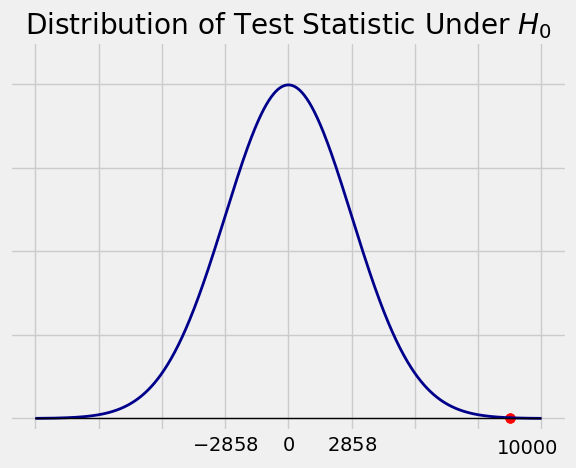

In [4]:
# NO CODE

z = np.arange(-4, 4.01, .01)
phi = stats.norm.pdf(z)
plt.plot(z, phi, color='darkblue', lw=2)
plt.plot([-4, 4], [0, 0], color='k', lw=1)
x_tick_labels = ['', '', '', '$-2858$', '$0$', '$2858$', '', '', '']
plt.xticks(np.arange(-4, 4.01), x_tick_labels)
plt.ylim(-0.015, 0.45)
plt.yticks(np.arange(0, 0.41, 0.1), 5*[''])
plt.ylabel('')
z = 10000/2858
plt.scatter(z, 0, color='red', s=50)
plt.text(z-0.2, -0.0425, '10000')
plt.title('Distribution of Test Statistic Under $H_0$');

The observed statistic is out in a tail of the distribution of the test statistic under the null hypothesis. So the data are not consistent with the null hypothesis. They support the hypothesis that City Y has the higher mean income.

The conclusion is clear from the figure. But if you want to compute a $p$-value, it would be approximately

$$
1 - \Phi\left(\frac{10000-0}{2858}\right) ~ = ~ 1 - \Phi(3.5) ~ = ~ 0.02\%
$$

which is tiny. The data support the alternative hypothesis.

### Confidence Interval for the Difference Between Proportions ###
This is the special case of the above when the $X$ and $Y$ samples both consist of 0's and 1's.

Assuming the sample sizes $n$ and $m$ to be large as before, suppose:

- $X_1, X_2, \ldots, X_n$ are i.i.d. Bernoulli $(p_X)$
- $Y_1, Y_2, \ldots, Y_n$ are i.i.d. Bernoulli $(p_Y)$

Then the difference between the two sample proportions is $\bar{X} - \bar{Y}$ is a natural estimator for $p_X - p_Y$, the difference between the two population proportions.

$$
\bar{X} - \bar{Y} ~ \text{ is approximately normal } \left(p_X - p_Y, \frac{p_Xq_X}{n} + \frac{p_Yq_Y}{m} \right)
$$

where $q_X = 1 - p_X$ and $q_Y = 1 - p_Y$. We have used the formula $pq$ for the variance of a Bernoulli $(p)$ random variable. The Bernoulli distribution is so simple – just 0 and 1 as the possible values – that $p$ determines both the mean and the variance.

Now suppose we have independent samples from two cities, and:

- 37% of the City $X$ sample are undecided about who they want as President
- 28% of the City $Y$ sample are undecided about who they want as President

We can construct a confidence interval for the difference between the percents of undecided people in City X and City Y, again taking the difference in the direction "X minus Y".

The center of the interval is the observed difference between the two sample proportions, $0.37 - 0.28 = 0.09$. An approximate 95% confidence interval for the difference between the proportions in the two cities is

$$
\begin{align*}
& 0.1 ~ \pm ~ 2 \sqrt{ \frac{p_Xq_X}{400} + \frac{p_Yq_Y}{600} } \\
\approx ~ & 0.09 ~ \pm ~ 2 \sqrt{ \frac{0.37\times0.63}{400} + \frac{0.28\times0.72}{600} } \\
\approx ~ & 0.09 ~ \pm ~ 2\times0.0303 \\
\approx ~ & (0.0294, 0.1506)
\end{align*}
$$

In [5]:
( (0.37 * 0.63 / 400) + (0.28 * 0.72 / 600) ) ** 0.5

0.030310889132455353

An approximate 95% confidence interval for the difference between the percents of undecided people in City X and City Y is $2.94\%$ to $15.06\%$.

### Test for the Equality of Two Proportions ###
We can also use the data to test whether the two underlying population proportions are the same. The calculation involves many of the same moves as in the calculation of the confidence interval above, with one major difference.

Suppose our hypotheses are:

$H_0$: $p_X = p_Y = p$; here $p$ is just a name we are giving to the common value of $p_X$ and $p_Y$

$H_A$: $p_X > p_Y$

A natural test statistic is $\bar{X} - \bar{Y}$, the difference between the two sample proportions. Large values of the statistic favor the alternative hypothesis.

Under $H_0$, the distribution of $\bar{X} - \bar{Y}$ is approximately normal with mean $0$ and variance

$$
\frac{pq}{400} + \frac{pq}{600}
$$

Because we are working under the null hypothesis, we must use the same value for $p_X$ and $p_Y$. This makes the expected difference equal to 0. But also, since the variance of a Bernoulli random variable depends only on $p$, it affects the calculation of the variance. Two zero-one populations can't have the same proportion of ones but different variances.

This is the only way in which the calculation differs from that of the confidence interval which does not make any hypotheses about equality. 

So now we have to estimate this common value of $p$. Under $H_0$, we can think of the combined sample as one gigantic sample of 1000 i.i.d. Bernoulli $(p)$ random variables. To estimate $p$, we will use the proportion of ones in the combined sample. This is

$$
\begin{align*}
\hat{p} ~ &= ~ \frac{0.37\times400 ~ + ~ 0.26\times600}{1000} \\
&= ~ 0.37\times0.4 ~ + ~ 0.26\times0.6\\
&= ~ 0.316
\end{align*}
$$

Notice that $\hat{p}$ is the weighted average of the two sample proportions, where the weights are the sample sizes.

Thus under $H_0$, the test statistic $\bar{X} - \bar{Y}$ is approximately normal with mean $0$ and SD

$$
\begin{align*}
& \sqrt{ \frac{pq}{400} + \frac{pq}{600} } \\
\approx ~ & \sqrt{ \frac{0.316\times0.684}{400} + \frac{0.316\times0.684}{600} }\\
\approx ~ & 0.03
\end{align*}
$$

In [6]:
( 0.316*0.684/400 + 0.316*0.684/600 ) ** 0.5

0.03000999833388866

The observed value of the test statistic is $0.37 - 0.28 = 0.09$. This is the red dot in the figure below.

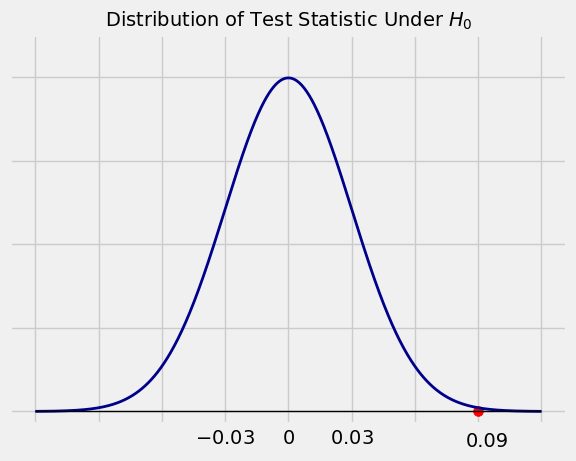

In [7]:
# NO CODE

z = np.arange(-4, 4.01, .01)
phi = stats.norm.pdf(z)
plt.plot(z, phi, color='darkblue', lw=2)
plt.plot([-4, 4], [0, 0], color='k', lw=1)
x_tick_labels = ['', '', '', '$-0.03$', '$0$', '$0.03$', '', '', '']
plt.xticks(np.arange(-4, 4.01), x_tick_labels)
plt.ylim(-0.015, 0.45)
plt.yticks(np.arange(0, 0.41, 0.1), 5*[''])
plt.ylabel('')
z = 0.09/0.03
plt.scatter(z, 0, color='red', s=50)
plt.text(z-0.2, -0.0425, '0.09')
plt.title('Distribution of Test Statistic Under $H_0$', fontsize=14);

The observed value 0.09 is in a tail of the distribution, three standard deviations away from what is expected under the null hypothesis. The data are not consistent with the null hypothesis. They favor the alternative hypothesis that the percent of undecided people in City X is greater than that in City Y.